In [61]:
import numpy as np
from array import array
import os
import sys
import ROOT
from scipy.spatial import distance
from scipy.stats import chi2
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
from fastSimulation import *

In [62]:
folder="${fastMCKalmanOptTesting}/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/"
foldercheck=folder+"Covariance/"
#folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCSA/"
inputData = folder+"fastParticle.list"
ROOT.initTreeFast(inputData)
tree=ROOT.treeFast
treeSeed = ROOT.treeSeed

Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root


In [63]:
tree.SetMarkerStyle(25)
tree.SetMarkerSize(0.5)
ROOT.setAliases(tree)
tree.SetAlias("p0MC","part.fParamMC[1].fP[0]")
tree.SetAlias("p0In","part.fParamIn[1].fP[0]")

tree.SetAlias("p1MC","part.fParamMC[1].fP[1]")
tree.SetAlias("p1In","part.fParamIn[1].fP[1]")

tree.SetAlias("p2MC","part.fParamMC[1].fP[2]")
tree.SetAlias("p2In","part.fParamIn[1].fP[2]")

tree.SetAlias("p3MC","part.fParamMC[1].fP[3]")
tree.SetAlias("p3In","part.fParamIn[1].fP[3]")

tree.SetAlias("p4MC","part.fParamMC[1].fP[4]")
tree.SetAlias("p4In","part.fParamIn[1].fP[4]")

tree.SetAlias("pMC","part.fParamMC[1].fData.P()")
tree.SetAlias("pIn","part.fParamIn[1].fData.P()")

tree.SetAlias("Res0MC","(p0In-p0MC)/p0MC")
tree.SetAlias("Res1MC","(p1In-p1MC)/p1MC")
tree.SetAlias("Res2MC","(p2In-p2MC)/p2MC")
tree.SetAlias("Res3MC","(p3In-p3MC)/p3MC")
tree.SetAlias("Res4MC","(p4In-p4MC)/p4MC")
tree.SetAlias("RespMC","(pIn-pMC)/pMC")

tree.SetAlias("Unit0MC","(p0In-p0MC)/sqrt(part.fParamIn[1].fC[0])")
tree.SetAlias("Unit1MC","(p1In-p1MC)/sqrt(part.fParamIn[1].fC[2])")
tree.SetAlias("Unit2MC","(p2In-p2MC)/sqrt(part.fParamIn[1].fC[5])")
tree.SetAlias("Unit3MC","(p3In-p3MC)/sqrt(part.fParamIn[1].fC[9])")
tree.SetAlias("Unit4MC","(p4In-p4MC)/sqrt(part.fParamIn[1].fC[14])")

tree.SetAlias("sigmaqPt0","sqrt(part.fParamIn[1].fC[14])")
tree.SetAlias("sigmaPtRel0","sigmaqPt0*ptMC")
tree.SetAlias("LArm","getStat(2)")

tree.SetAlias("isOK","part.fStatusMaskIn.fData[1]==31")
#part.fStatusMaskIn.fData[1]==31

True

# Testing the M distances between the parameters

## First the whole matrix

In [64]:
gStyle.SetOptStat(1)
tree.SetMarkerStyle(25)
tree.SetMarkerSize(0.5)
hDistance   = ROOT.TH1D( 'hDistance', 'Distance', 200, 0,25 )


def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

for iev in range(treeSeed.GetEntries()):
    treeSeed.GetEntry(iev)
    #size = treeSeed.seed.AliExternalTrackParam.size() 
    if(tree.part.fStatusMaskIn[1]!=31): continue
    C=[]
    xMC=[]
    xSeed=[]

    #treeSeed.Print()
    for i in range(15): 
        C.append(tree.part.fParamIn[1].GetCovariance()[i]) 
        #print(tree.part.fParamIn[1].GetCovariance()[i])

    for i in range(5): 
        xMC.append(tree.part.fParamMC[1].GetParameter()[i]) 
        xSeed.append(tree.part.fParamIn[1].GetParameter()[i]) 

    S = np.array([[C[0], C[1], C[3], C[6], C[10]],
                  [C[1], C[2], C[4], C[7], C[11]],
                  [C[3], C[4], C[5], C[8], C[12]],
                  [C[6] ,C[7], C[8], C[9], C[13]],
                  [C[10],C[11],C[12],C[13],C[14]]])

    
    #print(S)
    Sinv = np.linalg.inv(S)

    c = distance.mahalanobis(xMC,xSeed,Sinv)
    hDistance.Fill(c*c)
 
    

Warning in <TROOT::Append>: Replacing existing TH1: hDistance (Potential memory leak).


 FCN=176.026 FROM MIGRAD    STATUS=CONVERGED      46 CALLS          47 TOTAL
                     EDM=1.10049e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.92105e+00   3.09084e-02   2.01360e-04  -2.46211e-02
   2  p1           9.24390e+02   1.07582e+01   6.98919e-02   1.18638e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: hd
python ERROR: cannot open image file "/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanceKalman.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanceKalman.png


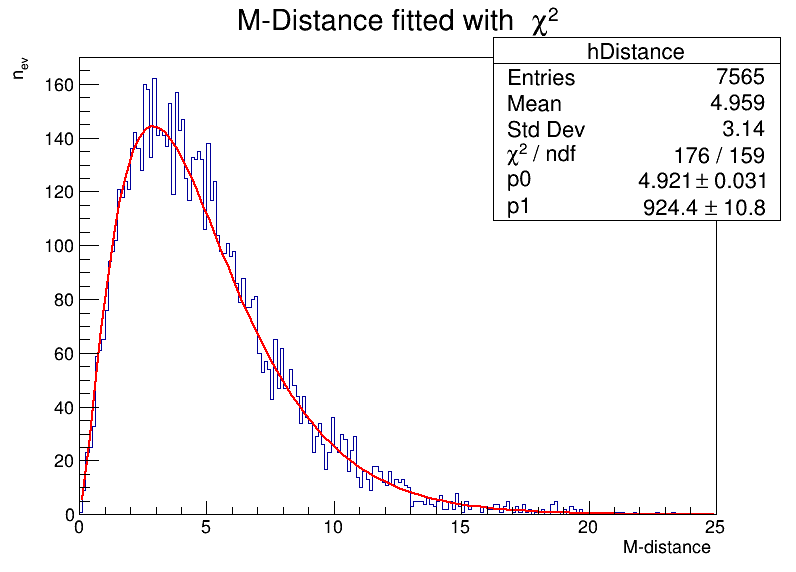

In [65]:
formula = "[1]*ROOT::Math::chisquared_pdf(x,[0])"
fchi2 = ROOT.TF1("fchi2",formula,0,25)
fchi2.SetParameters(5,10000)
  
hd = ROOT.TCanvas("hd","hd",800,600)
hDistance.SetTitle("M-Distance fitted with #chi^{2};M-distance;n_{ev}")
#fchi2.Draw()
hDistance.Draw()
hDistance.Fit("fchi2")

hd.Draw()
save=foldercheck+"MDistanceKalman"+".png"
hd.Print(save)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq
python ERROR: cannot open image file "/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/QQplotKalman.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/QQplotKalman.png


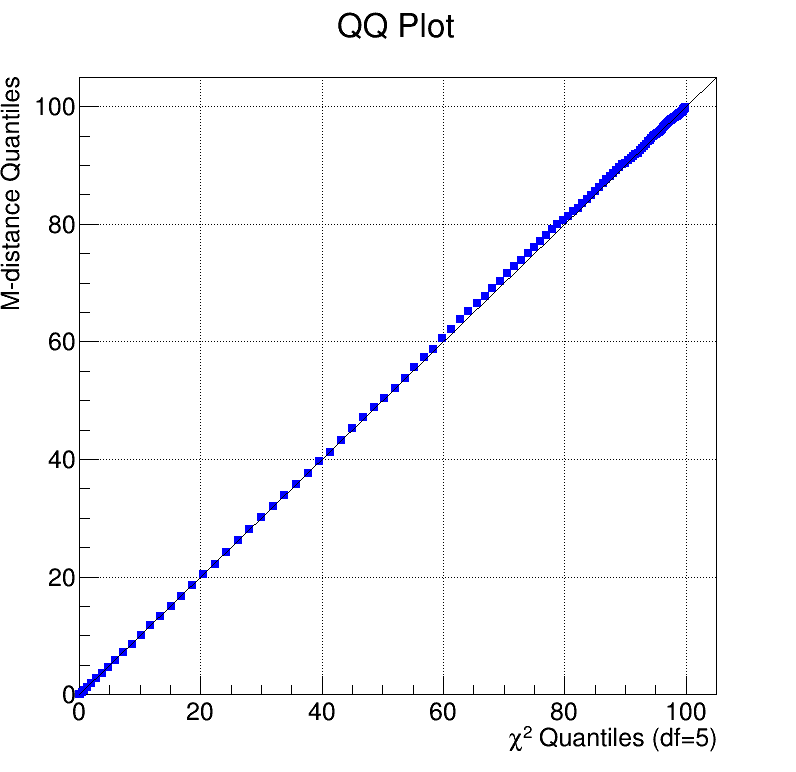

In [66]:
M_distance = array('d')
chi2_quant = array('d')

for b in range (1,hDistance.GetNbinsX()+1):
    edge = hDistance.GetBinLowEdge(b+1)
    quant = chi2.cdf(edge, 5) * 100
    integ = hDistance.Integral(1,b) / hDistance.GetEntries() * 100
    chi2_quant.append(quant)
    M_distance.append(integ)

QQ_graph = ROOT.TGraph(len(chi2_quant),chi2_quant,M_distance)

hq = ROOT.TCanvas("hq","hq",800,800)
hq.SetGrid()
QQ_graph.SetTitle("QQ Plot;#chi^{2} Quantiles (df=5);M-distance Quantiles")
QQ_graph.SetMarkerColor(4)
QQ_graph.SetMarkerSize(1)
QQ_graph.SetMarkerStyle(21)
QQ_graph.GetXaxis().SetLimits(0.,105.)                 # along X
QQ_graph.GetHistogram().SetMaximum(105.)   # along          
QQ_graph.GetHistogram().SetMinimum(0.)  #   Y
#fchi2.Draw()
l = ROOT.TLine(0.0,0.0,105,105)

QQ_graph.Draw("AP")
l.Draw("same")


hq.Draw()
save=foldercheck+"QQplotKalman"+".png"
hq.Print(save)


## Now pair by pair

 FCN=94.213 FROM MIGRAD    STATUS=CONVERGED      72 CALLS          73 TOTAL
                     EDM=2.70927e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.99078e+00   1.89935e-02   9.04906e-05   1.92761e-03
   2  p1           9.36629e+02   1.08374e+01   5.16300e-02  -5.84655e-06
 FCN=93.4351 FROM MIGRAD    STATUS=CONVERGED      74 CALLS          75 TOTAL
                     EDM=2.97603e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.96882e+00   1.89004e-02   8.96706e-05   7.41511e-04
   2  p1           9.36023e+02   1.08311e+01   5.13862e-02  -1.82180e-06
 FCN=117.833 FROM MIGRAD    STATUS=CONVERGED      73 CALLS          74 TOTAL
                     EDM=1.066

python ERROR: cannot open image file "/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanceKalman_01.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanceKalman_01.png
python ERROR: cannot open image file "/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanceKalman_02.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanceKa

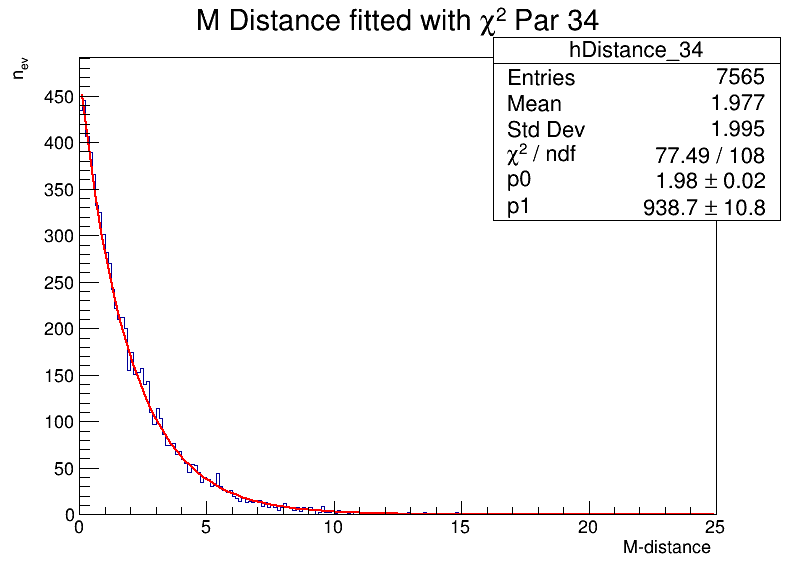

In [67]:
harray = []

for xx in range (5):
    for yy in range (xx):
        name = 'hDistance_'+str(yy)+str(xx)
        hDistance   = ROOT.TH1D( name, name, 200, 0,25 )
        harray.append(hDistance)



for iev in range(treeSeed.GetEntries()):
    treeSeed.GetEntry(iev)
    #size = treeSeed.seed.AliExternalTrackParam.size() 
    if(tree.part.fStatusMaskIn[1]!=31): continue
    #if(size==0): continue
    C=[]
    xMC=[]
    xSeed=[]

    
    #treeSeed.Print()
    for i in range(15): 
        C.append(tree.part.fParamIn[1].GetCovariance()[i]) 

    for i in range(5): 
        xMC.append(tree.part.fParamMC[1].GetParameter()[i]) 
        xSeed.append(tree.part.fParamIn[1].GetParameter()[i]) 

    S = np.array([[C[0], C[1], C[3], C[6], C[10]],
                  [C[1], C[2], C[4], C[7], C[11]],
                  [C[3], C[4], C[5], C[8], C[12]],
                  [C[6] ,C[7], C[8], C[9], C[13]],
                  [C[10],C[11],C[12],C[13],C[14]]])
    
    #print(xMC)
    #print(xSeed)
    #print(S)

    arraycounter = 0

    for xx in range (5):
        for yy in range (xx):
            #print(yy,xx)
            S2 = np.array([[S[yy][yy],S[yy][xx]],
                           [S[xx][yy],S[xx][xx]]])
            #print(S2)

            xMC2 = [xMC[yy],xMC[xx]] 

            #print(xMC2)

            xSeed2 = [xSeed[yy],xSeed[xx]]

            #print(xSeed2)

            Sinv2 = np.linalg.inv(S2)

            c = distance.mahalanobis(xMC2,xSeed2,Sinv2)
            #print(harray[arraycounter])
            harray[arraycounter].Fill(c*c)
            arraycounter+=1

arraycounter = 0
for xx in range (5):
    for yy in range (xx):
        #print(harray[arraycounter])
        fname="fchi2_"+str(yy)+str(xx)
        fchi2_2 = ROOT.TF1(fname,formula,0,15)
        fchi2_2.SetParameters(5,10000)

        Canvas = "c_"+str(yy)+str(xx)
        cM = ROOT.TCanvas(Canvas,Canvas,800,600)
        Title = "M Distance fitted with #chi^{2} Par "+str(yy)+str(xx)+";M-distance;n_{ev}"
        harray[arraycounter].SetTitle(Title)
        harray[arraycounter].Draw()
        harray[arraycounter].Fit(fchi2_2)
        cM.Draw()
        save=foldercheck+"MDistanceKalman_"+str(yy)+str(xx)+".png"
        cM.Print(save)
        arraycounter+=1    
   

## Now just excluding one

 FCN=221.895 FROM MIGRAD    STATUS=CONVERGED      34 CALLS          35 TOTAL
                     EDM=9.05644e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.92683e+00   2.63386e-02   1.91988e-04  -1.25204e-02
   2  p1           9.19455e+02   1.07314e+01   7.82292e-02   2.52296e-05
 FCN=136.067 FROM MIGRAD    STATUS=CONVERGED      34 CALLS          35 TOTAL
                     EDM=1.37127e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.96835e+00   2.74028e-02   1.56648e-04   9.69280e-04
   2  p1           9.30288e+02   1.07964e+01   6.17173e-02   4.16607e-06
 FCN=153.632 FROM MIGRAD    STATUS=CONVERGED      34 CALLS          35 TOTAL
                     EDM=1.91

python ERROR: cannot open image file "/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanceKalman_no0.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanceKalman_no0.png
python ERROR: cannot open image file "/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanceKalman_no1.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistanc

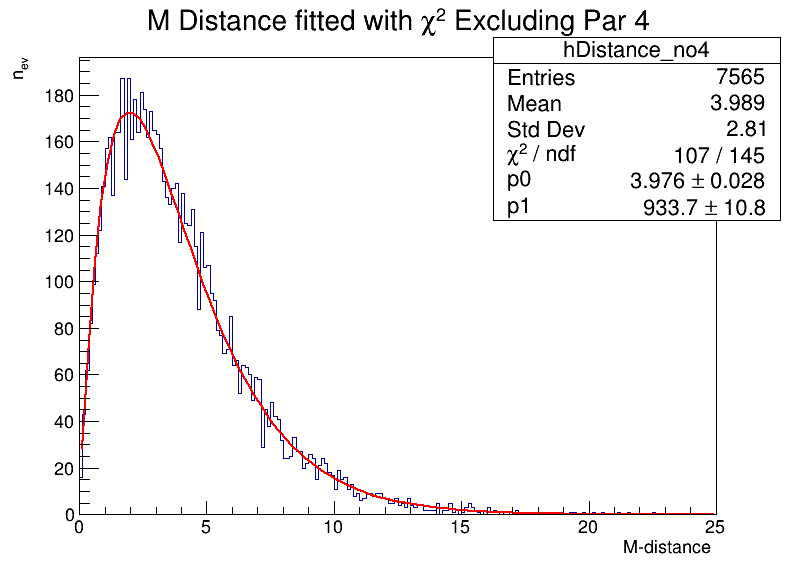

In [68]:
harray = []

for xx in range (5):
    name = 'hDistance_no'+str(xx)
    #print(name)
    hDistance   = ROOT.TH1D( name, name, 200, 0,25 )
    harray.append(hDistance)

        
for iev in range(treeSeed.GetEntries()):
    treeSeed.GetEntry(iev)
    if(tree.part.fStatusMaskIn[1]!=31): continue
    #size = treeSeed.seed.AliExternalTrackParam.size() 
    #if(size==0): continue
    C=[]
    xMC=[]
    xSeed=[]

    
    #treeSeed.Print()
    for i in range(15): 
        C.append(tree.part.fParamIn[1].GetCovariance()[i]) 

    for i in range(5): 
        xMC.append(tree.part.fParamMC[1].GetParameter()[i]) 
        xSeed.append(tree.part.fParamIn[1].GetParameter()[i]) 

    S = np.array([[C[0], C[1], C[3], C[6], C[10]],
                  [C[1], C[2], C[4], C[7], C[11]],
                  [C[3], C[4], C[5], C[8], C[12]],
                  [C[6] ,C[7], C[8], C[9], C[13]],
                  [C[10],C[11],C[12],C[13],C[14]]])
    
    #print(xMC)
    #print(xSeed)
    #print(S)

    arraycounter = 0

    for xx in range (5):
    
        #print(xx)
        S4 = []
        xMC4 = []
        xSeed4 = []

        for ii in range (5):
            row = []
            for jj in range (5):
                if(ii!=xx and jj!=xx): 
                    row.append(S[ii][jj])

            if(len(row)!=0): 
                S4.append(row)

            if(ii!=xx):
                xMC4.append(xMC[ii])
                xSeed4.append(xSeed[ii])

        #print(xMC4)
        #print(xSeed4)
        #print(S4)
        
        S4inv =  np.linalg.inv(S4)       
        
        c = distance.mahalanobis(xMC4,xSeed4,S4inv)
        harray[xx].Fill(c*c)
        
for k in range (5):
    fname="fchi2_"+str(k)
    fchi2_4 = ROOT.TF1(fname,formula,0,15)
    fchi2_4.SetParameters(4,1000)

    Canvas = "c_"+str(k)
    cM = ROOT.TCanvas(Canvas,Canvas,800,600)
    Title = "M Distance fitted with #chi^{2} Excluding Par "+str(k)+";M-distance;n_{ev}"
    harray[k].SetTitle(Title)
    harray[k].Draw()
    harray[k].Fit(fchi2_4)
    cM.Draw()
    save=foldercheck+"MDistanceKalman_no"+str(k)+".png"
    cM.Print(save)
   


# Diagonal elements unit test

 FCN=76.0404 FROM MIGRAD    STATUS=CONVERGED      52 CALLS          53 TOTAL
                     EDM=2.18428e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.40545e+02   3.39999e+00   1.19158e-02  -2.14163e-05
   2  Mean         7.61583e-03   1.15603e-02   4.95202e-05   3.85053e-04
   3  Sigma        9.94340e-01   8.17945e-03   9.54667e-06  -2.58500e-02
 FCN=102.589 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=3.6474e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.43058e+02   3.43667e+00   1.39829e-02  -2.61465e-05
   2  Mean        -1.08646e-02   1.14658e-02   5.68873e-05   1.60769e-03
   3  Sigma        9.81337e-01   8

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h0
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/UnitK_p0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h1
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/UnitK_p1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h2
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt10/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/UnitK_p2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h3
Info in <TCanvas::Print>: png file /home/federico/Documents/Uni

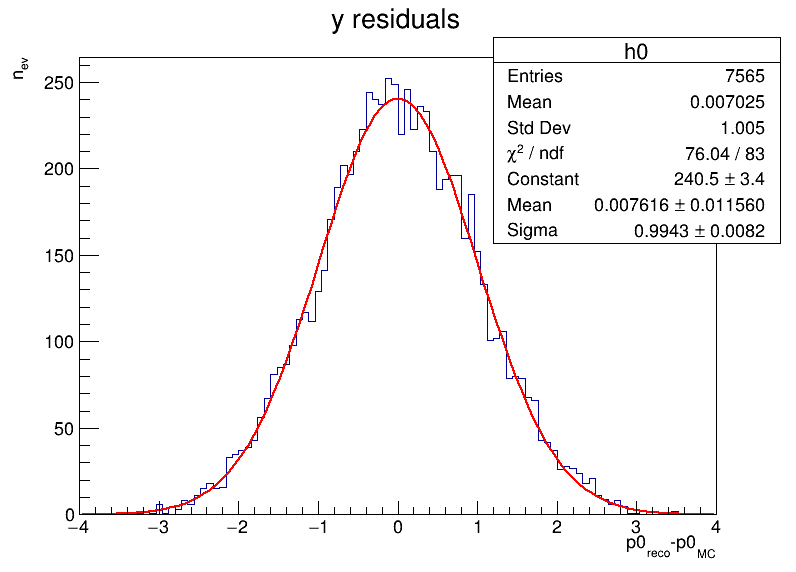

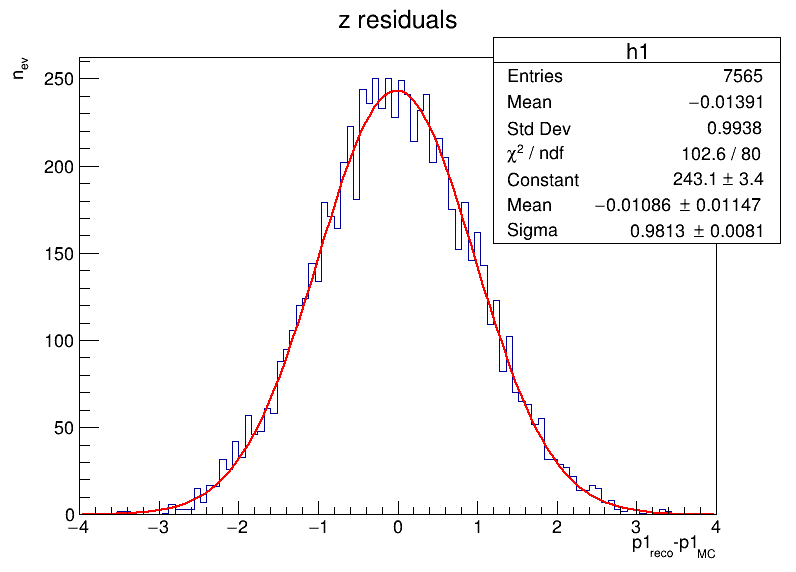

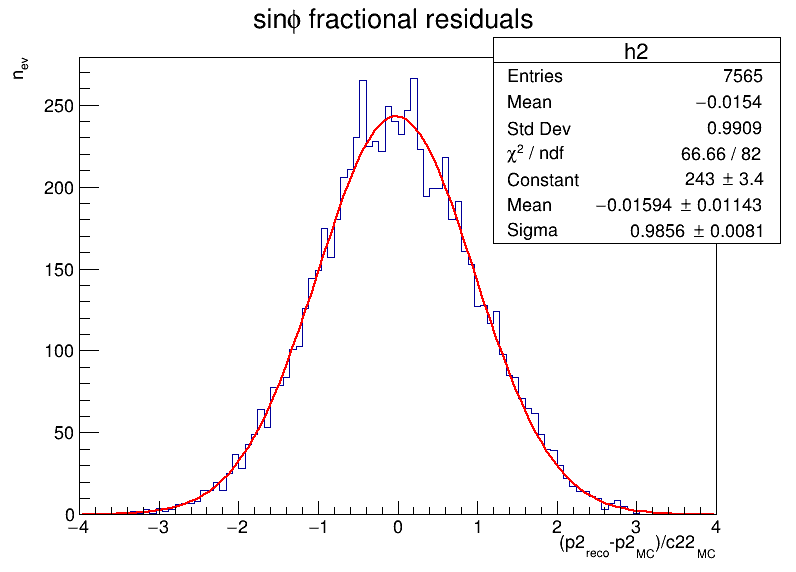

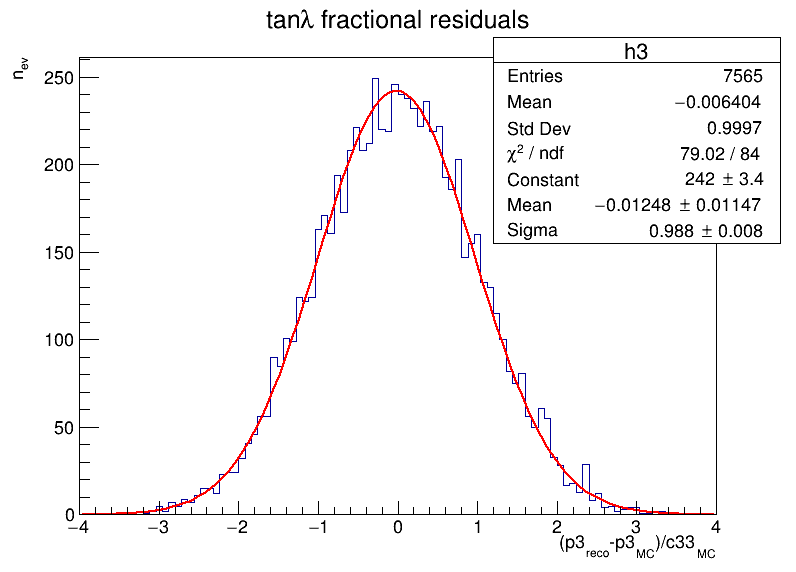

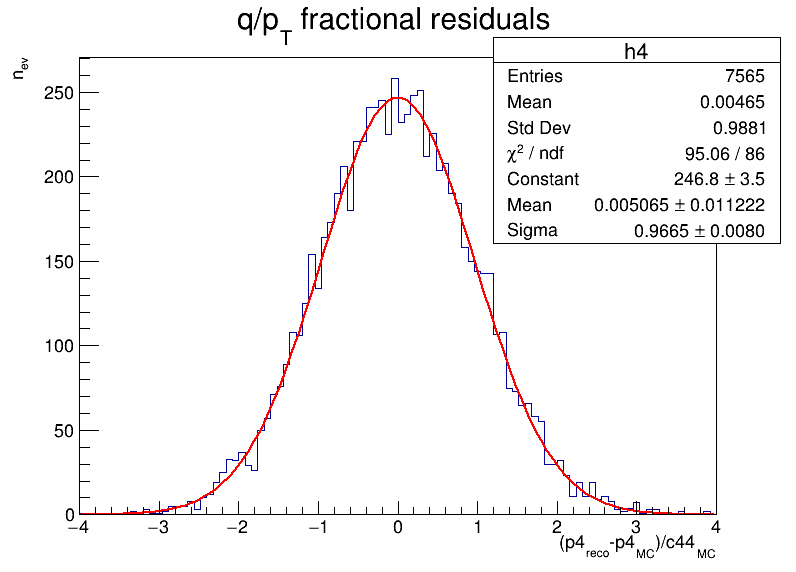

In [69]:
gStyle.SetOptStat(1)
gStyle.SetOptFit(1)

ch0 = ROOT.TCanvas("h0","h0",800,600)
#treeSeed.Draw("(p0Seed-p0MC)>>h0(100,-0.00005,0.00005)")
#treeSeed.Draw("(p0Seed-p0MC)>>h0")treeSeed.Draw("Unit2MC>>h2(100,-4,4)")
tree.Draw("Unit0MC>>h0(100,-4,4)","isOK")
histo0 = ROOT.gDirectory.Get("h0")
histo0.SetTitle("y residuals;p0_{reco}-p0_{MC};n_{ev}")
histo0.Fit("gaus")
ch0.Draw()
save=folder+"UnitK_p0"+".png"
ch0.Print(save)

ch1 = ROOT.TCanvas("h1","h1",800,600)
tree.Draw("Unit1MC>>h1(100,-4,4)","isOK")
#treeSeed.Draw("(p1Seed-p1MC)>>h1(100,-0.00005,0.00005)")
histo1 = ROOT.gDirectory.Get("h1")
histo1.SetTitle("z residuals;p1_{reco}-p1_{MC};n_{ev}")
histo1.Fit("gaus")
ch1.Draw()
save=folder+"UnitK_p1"+".png"
ch1.Print(save)

ch2 = ROOT.TCanvas("h2","h2",800,600)
tree.Draw("Unit2MC>>h2(100,-4,4)","isOK")
histo2 = ROOT.gDirectory.Get("h2")
histo2.SetTitle("sin#phi fractional residuals;(p2_{reco}-p2_{MC})/c22_{MC};n_{ev}")
histo2.Fit("gaus")
ch2.Draw()
save=folder+"UnitK_p2"+".png"
ch2.Print(save)

ch3 = ROOT.TCanvas("h3","h3",800,600)
tree.Draw("Unit3MC>>h3(100,-4,4)","isOK")
histo3 = ROOT.gDirectory.Get("h3")
histo3.SetTitle("tan#lambda fractional residuals;(p3_{reco}-p3_{MC})/c33_{MC};n_{ev}")
histo3.Fit("gaus")
ch3.Draw()
save=folder+"UnitK_p3"+".png"
ch3.Print(save)

ch4 = ROOT.TCanvas("h4","h4",800,600)
tree.Draw("Unit4MC>>h4(100,-4,4)","isOK")
histo4 = ROOT.gDirectory.Get("h4")
histo4.SetTitle("q/p_{T} fractional residuals;(p4_{reco}-p4_{MC})/c44_{MC};n_{ev}")
histo4.Fit("gaus")
ch4.Draw()
save=folder+"UnitK_p4"+".png"
ch4.Print(save)